# Data Exploration - Temperature Per Country
---

In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  datetime import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline

CPU times: user 1.01 s, sys: 224 ms, total: 1.23 s
Wall time: 1.32 s


In [2]:
df_temp = pd.read_csv ('../data/temperatures/GlobalLandTemperaturesByCountry.csv', parse_dates = ['dt'])

---
### A Random Slice of the Original Dataset
---

In [3]:
df_temp.sample (5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
20093,2009-03-01,23.067,0.639,Angola
367592,1767-01-01 00:00:00,-3.464,7.486,Netherlands
169175,1978-02-01,-1.859,0.166,Europe
109479,1957-12-01,13.023,0.342,Chile
353378,1887-05-01 00:00:00,26.091,0.925,Montserrat


In [4]:
print '[INFO] %20s: ' % ('Before Shape'), df_temp.shape
df_tempC = df_temp.dropna ()
print '[INFO] %20s: ' % ('After Shape'), df_tempC.shape

[INFO]         Before Shape:  (577462, 4)
[INFO]          After Shape:  (544811, 4)


---
### Rename columns
---
I am ranaming the remaining columns in the dataframe to simpler names for easier reference later on.

In [5]:
df_temp = df_tempC.rename (index = str, columns = {'AverageTemperature': 'avgTemp', 'AverageTemperatureUncertainty': 'uncertainty'})
df_temp.sample (5)

,dt,avgTemp,uncertainty,Country
7936,1796-01-01 00:00:00,5.515,3.088,Albania
428797,1890-08-01 00:00:00,21.926,0.581,Romania
256235,2010-12-01,1.784,0.452,Ireland
35030,1870-05-01 00:00:00,17.855,1.256,Australia
551020,1962-01-01,4.119,0.189,United Kingdom (Europe)


---
### Feature Engineering - Extract 'Year' of each sample
---
I want to extract a single represetative value of Earth's land temperature reading for each year in the dataframe. To achieve that, here I extract the 'year' from each temperature reading as the first step.

In [6]:
# Extract year from each reading
df_temp ['year'] = pd.DatetimeIndex (df_temp ['dt']).year
df_temp = df_temp.drop (['dt'], axis = 1)
df_temp.tail ()

,avgTemp,uncertainty,Country,year
577456,21.142,0.495,Zimbabwe,2013
577457,19.059,1.022,Zimbabwe,2013
577458,17.613,0.473,Zimbabwe,2013
577459,17.000,0.453,Zimbabwe,2013
577460,19.759,0.717,Zimbabwe,2013


---
## Cleanup - Keep Post - 1900 Data
---

In [7]:
df_tempPost1900 = df_temp [df_temp.year > 1899]
df_tempPost1900.head ()

,avgTemp,uncertainty,Country,year
1874,-3.026,0.538,Åland,1900
1875,-8.063,0.657,Åland,1900
1876,-3.196,0.467,Åland,1900
1877,0.781,0.224,Åland,1900
1878,4.960,0.503,Åland,1900


In [8]:
df_tempPost1900 = df_tempPost1900.drop (['uncertainty'], axis = 1)
df_tempPost1900.sample (5)

,avgTemp,Country,year
115936,24.872,Colombia,1924
233888,23.023,Honduras,1910
183255,7.854,France (Europe),1922
515360,27.265,Taiwan,1926
39432,5.213,Austria,1967


---
## Faceting - Create Avg. Temp Dataframe Per Country
---

In [9]:
dfPerCountry = {}
countries = df_tempPost1900 ['Country'].unique ()

for country in countries:
    dfPerCountry [country] = df_tempPost1900 [df_tempPost1900 ['Country'] == country]

print dfPerCountry

{'Canada':         avgTemp Country  year
98831   -23.610  Canada  1900
98832   -22.475  Canada  1900
98833   -16.527  Canada  1900
98834    -4.487  Canada  1900
98835     3.231  Canada  1900
98836     9.962  Canada  1900
98837    12.557  Canada  1900
98838    11.180  Canada  1900
98839     5.561  Canada  1900
98840    -1.842  Canada  1900
98841   -14.211  Canada  1900
98842   -19.564  Canada  1900
98843   -24.737  Canada  1901
98844   -21.640  Canada  1901
98845   -15.797  Canada  1901
98846    -6.003  Canada  1901
98847     3.083  Canada  1901
98848     8.703  Canada  1901
98849    12.863  Canada  1901
98850    11.479  Canada  1901
98851     4.823  Canada  1901
98852    -1.659  Canada  1901
98853   -13.113  Canada  1901
98854   -18.629  Canada  1901
98855   -22.786  Canada  1902
98856   -17.884  Canada  1902
98857   -16.288  Canada  1902
98858    -6.723  Canada  1902
98859     1.983  Canada  1902
98860     7.235  Canada  1902
...         ...     ...   ...
100166   -7.651  Canada  2011

---
## Faceting - Calculate Avg. Temp / Year / Country
---

In [10]:
aggDfPerCntry = {}
for country in countries:
    aggDfPerCntry [country] = dfPerCountry [country].groupby ('year')[['avgTemp']].mean ()
    aggDfPerCntry [country] = aggDfPerCntry [country].sort_index ()
    aggDfPerCntry [country] = aggDfPerCntry [country].rename (index = str, columns = {'avgTemp': country})

print aggDfPerCntry

{'Canada':         Canada
year          
1900 -5.018750
1901 -5.052250
1902 -5.170917
1903 -5.302583
1904 -5.905083
1905 -5.106417
1906 -5.049417
1907 -6.563083
1908 -5.241417
1909 -5.907833
1910 -5.078417
1911 -5.536833
1912 -5.233083
1913 -5.774667
1914 -5.778167
1915 -4.173167
1916 -5.470167
1917 -6.369583
1918 -5.950750
1919 -5.369583
1920 -4.910583
1921 -4.750417
1922 -5.726000
1923 -5.276917
1924 -4.860167
1925 -5.264167
1926 -4.975083
1927 -5.359583
1928 -4.286417
1929 -5.461583
...        ...
1984 -4.634250
1985 -4.901167
1986 -4.843917
1987 -3.343333
1988 -4.125167
1989 -5.073333
1990 -5.021917
1991 -4.426667
1992 -4.928917
1993 -4.401500
1994 -4.433667
1995 -4.314333
1996 -4.941167
1997 -4.231500
1998 -2.553917
1999 -3.186333
2000 -4.025917
2001 -3.100083
2002 -4.362833
2003 -3.859500
2004 -4.923083
2005 -3.308750
2006 -2.460167
2007 -4.060917
2008 -4.295250
2009 -4.135083
2010 -1.887917
2011 -3.557083
2012 -3.176833
2013 -1.640667

[114 rows x 1 columns], 'Federated States O

---
## Transform - Merge Per Country Dataframes to Get Global Dataframe / Year / Country
---

In [11]:
df_tempPerCountry = aggDfPerCntry [countries [0]]
for country in countries [1:]:
    df_tempPerCountry = pd.merge (df_tempPerCountry, aggDfPerCntry [country], left_index = True, right_index = True)
    print '[INFO] Merged %-56s | Resulting Shape of Global DF:' % country, df_tempPerCountry.shape

[INFO] Merged Afghanistan                                              | Resulting Shape of Global DF: (114, 2)
[INFO] Merged Africa                                                   | Resulting Shape of Global DF: (114, 3)
[INFO] Merged Albania                                                  | Resulting Shape of Global DF: (114, 4)
[INFO] Merged Algeria                                                  | Resulting Shape of Global DF: (114, 5)
[INFO] Merged American Samoa                                           | Resulting Shape of Global DF: (114, 6)
[INFO] Merged Andorra                                                  | Resulting Shape of Global DF: (114, 7)
[INFO] Merged Angola                                                   | Resulting Shape of Global DF: (114, 8)
[INFO] Merged Anguilla                                                 | Resulting Shape of Global DF: (114, 9)
[INFO] Merged Antigua And Barbuda                                      | Resulting Shape of Global DF: (

---
## Merged DataFrame
---

In [12]:
df_tempPerCountry.sample (5)

,Åland,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1991,6.433667,14.370750,24.422250,12.338833,23.011083,27.171167,11.565417,22.095417,27.097333,26.895667,...,9.493667,17.973917,13.031083,25.506500,24.276500,26.777583,22.640333,26.594417,21.628917,21.789667
1961,6.833083,14.064917,24.028500,13.316750,23.390333,26.617167,12.261500,21.938750,26.935833,26.730917,...,8.642000,17.791583,13.459917,25.387250,24.092667,26.674833,23.084000,26.331167,21.541167,21.408500
1951,5.820583,13.967750,24.128333,13.569833,23.321667,26.689667,10.972917,22.002167,26.695250,26.537750,...,8.416583,17.339250,11.909083,25.358667,23.863667,26.432583,21.958833,26.388083,21.294167,21.102333
2011,7.170750,15.518000,24.786500,13.443250,24.144167,27.009500,12.994417,22.029667,27.528333,27.296167,...,9.549917,17.824583,13.141083,25.677333,23.692583,27.159250,23.401250,27.288250,21.771583,21.602417
1987,3.718250,14.984000,24.922000,12.996583,24.247750,26.898750,11.680250,22.749917,27.379583,27.220583,...,9.628167,17.658667,12.846333,25.977250,24.600917,27.143583,23.730750,26.612083,22.308583,22.323500


---
## Next Step
---
  - Add column for average global temperature for each year in the final dataframe above
  - Identify the countries whose temperature change most strongly correlates with the global temperature change
---

In [13]:
df_gTemp = pd.read_csv ('../data/firstPass/GlobalTemperatures.csv', parse_dates = ['dt'])
df_gTemp = df_gTemp.drop (['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandAverageTemperatureUncertainty'], axis = 1)
df_gTemp = df_gTemp.rename (index = str, columns = {'LandAverageTemperature': 'Global'})
df_gTemp ['year'] = pd.DatetimeIndex (df_gTemp ['dt']).year
df_gTemp = df_gTemp.drop (['dt'], axis = 1)
df_gAggTemp = df_gTemp.groupby ('year')[['Global']].mean ()
df_gAggTempPost1948 = df_gAggTemp [df_gAggTemp.index > 1947]
df_gAggTempFinal = df_gAggTempPost1948 [df_gAggTempPost1948.index < 2014]
df_gAggTempFinal.index = df_gAggTempFinal.index.map (unicode)

# Add global avg. temperature to per-country dataframe
df_final = df_tempPerCountry.join (df_gAggTempFinal, how = 'inner')

In [14]:
df_final.head ()

,Åland,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Global
year,,,,,,,,,,,,,,,,,,,,,
1948,6.045500,14.335250,24.007833,12.753917,23.071333,26.680417,11.935583,21.896333,26.847333,26.607250,...,17.168250,12.822250,25.180750,23.963667,26.615333,22.552583,26.334667,21.246417,21.110500,8.746750
1949,7.081083,13.350083,24.179750,12.518250,23.188167,26.851000,12.317917,21.928250,26.413083,26.231833,...,17.289250,11.123833,24.963667,24.044333,26.170167,22.543750,26.128250,21.684583,21.535083,8.586750
1950,5.957917,13.043500,23.880833,13.812833,22.781833,26.520083,11.812000,21.571833,26.266417,26.052333,...,17.413250,11.026167,24.793500,23.944833,25.997333,22.475833,25.815667,20.847667,21.258417,8.365250
1951,5.820583,13.967750,24.128333,13.569833,23.321667,26.689667,10.972917,22.002167,26.695250,26.537750,...,17.339250,11.909083,25.358667,23.863667,26.432583,21.958833,26.388083,21.294167,21.102333,8.625667
1952,4.795000,14.175417,24.275917,13.573917,23.185417,27.063750,11.660833,22.187667,26.866917,26.714250,...,17.530667,12.312417,25.560667,24.186833,26.609083,22.330167,26.081667,21.522750,21.325500,8.638250


In [15]:
autoCorr = {}
for country in countries:
    correl = df_final ['Global'].corr (df_final [country])
    autoCorr [country] = round (correl, 3)
    print '[INFO] %50s: %.3f' % (country, correl)

[INFO]                                             Åland: 0.456
[INFO]                                        Afghanistan: 0.784
[INFO]                                             Africa: 0.896
[INFO]                                            Albania: 0.547
[INFO]                                            Algeria: 0.822
[INFO]                                     American Samoa: 0.836
[INFO]                                            Andorra: 0.646
[INFO]                                             Angola: 0.755
[INFO]                                           Anguilla: 0.892
[INFO]                                Antigua And Barbuda: 0.892
[INFO]                                          Argentina: 0.503
[INFO]                                            Armenia: 0.628
[INFO]                                              Aruba: 0.739
[INFO]                                               Asia: 0.900
[INFO]                                          Australia: 0.714
[INFO]                    

In [16]:
import operator

# Sort the dictionary based on correlation value
sortedCorrel = sorted (autoCorr.items (), key = operator.itemgetter (1), reverse = True)

In [111]:
countries = []
tmpCorrel = []
dict_cntry = {}

for obj in sortedCorrel:
    countries.append (obj [0])
    tmpCorrel.append (obj [1])

df_global = pd.DataFrame.from_dict ({'countries': countries, 'correlation': tmpCorrel})
df_global.head ()

,correlation,countries
0,0.900,Asia
1,0.896,Liberia
2,0.896,Africa
3,0.895,Seychelles
4,0.892,Antigua And Barbuda


In [112]:
def conv_ascii(s):
    ret = ''
    for c in s:
        if ord (c) >= 128:
            c = ''
        ret += c
        
    return ret
        

newCountries = [conv_ascii (country) for country in countries]

In [113]:
import seaborn as sns

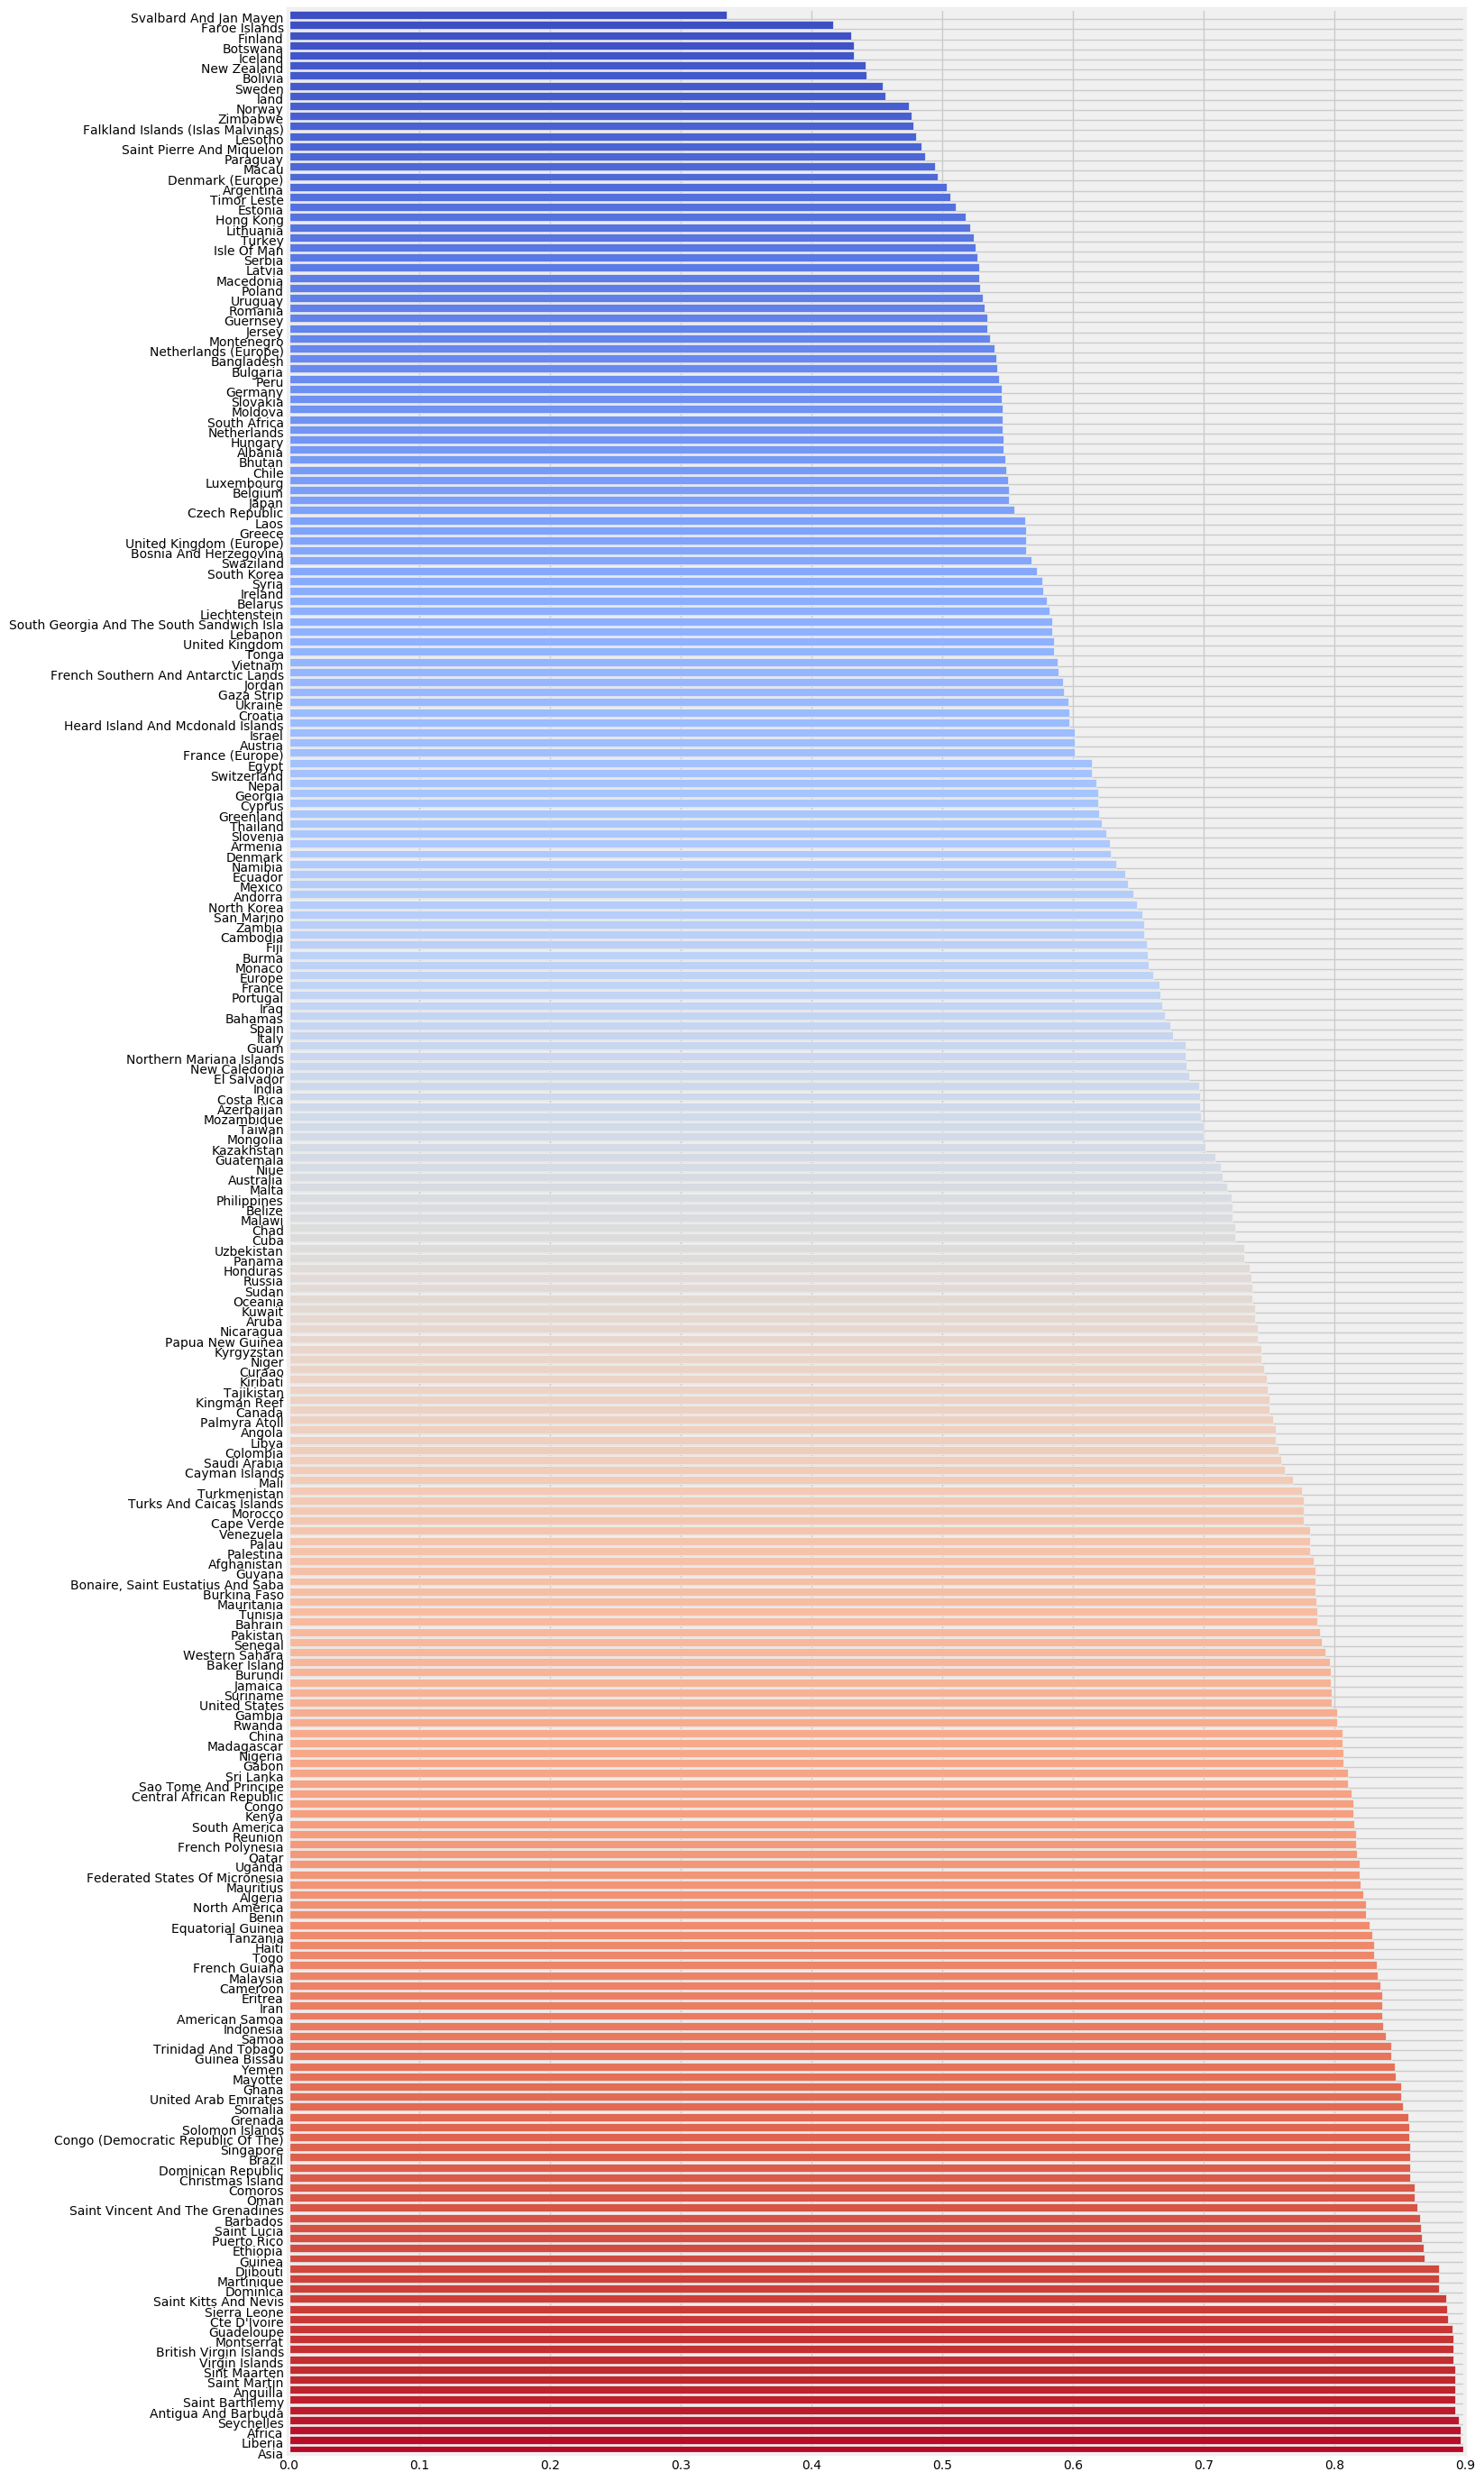

In [115]:
fig = plt.figure (figsize = (15, 35))
plt.barh (range (len (countries)), tmpCorrel, color = sns.color_palette ("coolwarm_r", len (countries)))
plt.ylim (0, len (countries))
plt.yticks (range (len (countries)), newCountries)
plt.show ()